### Exploratory Data Analysis

* **Author:** Brian P. Josey
* **Date Created:** 2020-03-26
* **Date Modified:** 2020-04-15
* **Language:** Python 3.7.6

This notebook contains my exploratory data analysis (EDA) of three data sets that concern the COVID-19 pandemic. This notebook will be used to understand the structure of the data sets, determine which features are useful, and which I can neglect. I may also do a little feature engineering and plotting.

The three data sets come from:

* The European Centre for Disease Prevention and Control (ECDC). The data comes in a CSV file that organizes the cases by country and date for every day since 2019-12-31. It may be directly downloaded from [the ECDC website](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).
* Johns Hopkins University Center for System Science and Engineering (JHU). This is a series of CSV files that are published daily. This set goes a step further by organizing the data at a sub-national level (*e.g.* state or province) and at the county-level for the US. It can [accessed from GitHub](https://github.com/CSSEGISandData/COVID-19).
* New York Times (NYT). The Times' coverage of the pandemic has been excellent, and on March 27 they made the decision to release their database as a [CSV on GitHub](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).

A quick glance suggests that the ECDC data will be useful for comparing the evolution of the pandemic at a national level, while the JHU and NYT data sets are more useful for looking at cases in the US, but this might change after I perform the EDA.

In [1]:
# Import Essential Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno

import warnings
warnings.filterwarnings('ignore')


## ECDC Data

I will start with the data from the ECDC, which must be manually downloaded from the website linked above and saved as a CSV file, dubbed **ECDC_data.csv**. The EDA below was performed on the data set from March 28, 2020.

In [8]:
# Import data into a data frame
ecdc_data = pd.read_csv("ECDC_data.csv")
ecdc_data.head(15)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,15/04/2020,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
1,14/04/2020,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
2,13/04/2020,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
3,12/04/2020,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
4,11/04/2020,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
5,10/04/2020,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
6,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
7,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
8,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
9,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0


### Data Exploration-ECDC

The ECDC data is composed of ten columns:

* **dateRep** (Datetime, DD-MM-YYYY): The date of the report in each row.
* **day** (Datetime, DD): Day of the month for the entry.
* **month** (Datetime, MM or M): Month for the entry.
* **cases** (Integer): The number of new cases reported in that country for that day. (*See note*)
* **deaths** (Integer): The number of new deaths reported in that country for that day. (*See note*)
* **countriesAndTerritories** (String): The name of the country or territory.
* **geoId** (String): The two letter code for the country or territory.
* **countryCode** (String): The three letter code for the country or territory.
* **popData2018:** (Float): The estimated population for the country or territory for 2018.

*Note*: The **cases** and **deaths** columns report the number of newly confirmed cases and deaths reported for that day. This is not immediately clear from the first rows of the data frame, but comparing the entries for my country (US) to the headlines made this clear. In order to get the cummulative number of cases/deaths, these columns need to be totaled first. The population estimates in the **popData2018** column come from the World Bank and are for 2018.

A few of the columns are redundant, the names of the countries correspond with the two and three letter country codes. Likewise, the dates are split into months and days, which the ECDC may have done to simplify feature engineering for some users. The most useful columns are **dateRep**, **cases**, **deaths**, and **countriesAndTerritories**. I may substitute **countriesAndTerritories** for either **geoId** or **countryterritoryCode**.

In [9]:
# Descriptive statistics, cases and deaths are useful. Day, month, year, and pop are meaningless.
ecdc_data.describe()

,day,month,year,cases,deaths,popData2018
count,10947.000000,10947.000000,10947.000000,10947.000000,10947.000000,1.087600e+04
mean,15.084224,2.776286,2019.993880,177.994976,11.506897,6.035340e+07
std,8.898448,1.288579,0.077997,1340.388181,90.481510,1.941407e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03
25%,8.000000,2.000000,2020.000000,0.000000,0.000000,2.951776e+06
50%,14.000000,3.000000,2020.000000,1.000000,0.000000,1.018318e+07
75%,23.000000,4.000000,2020.000000,18.000000,0.000000,3.843360e+07
max,31.000000,12.000000,2020.000000,35527.000000,2408.000000,1.392730e+09


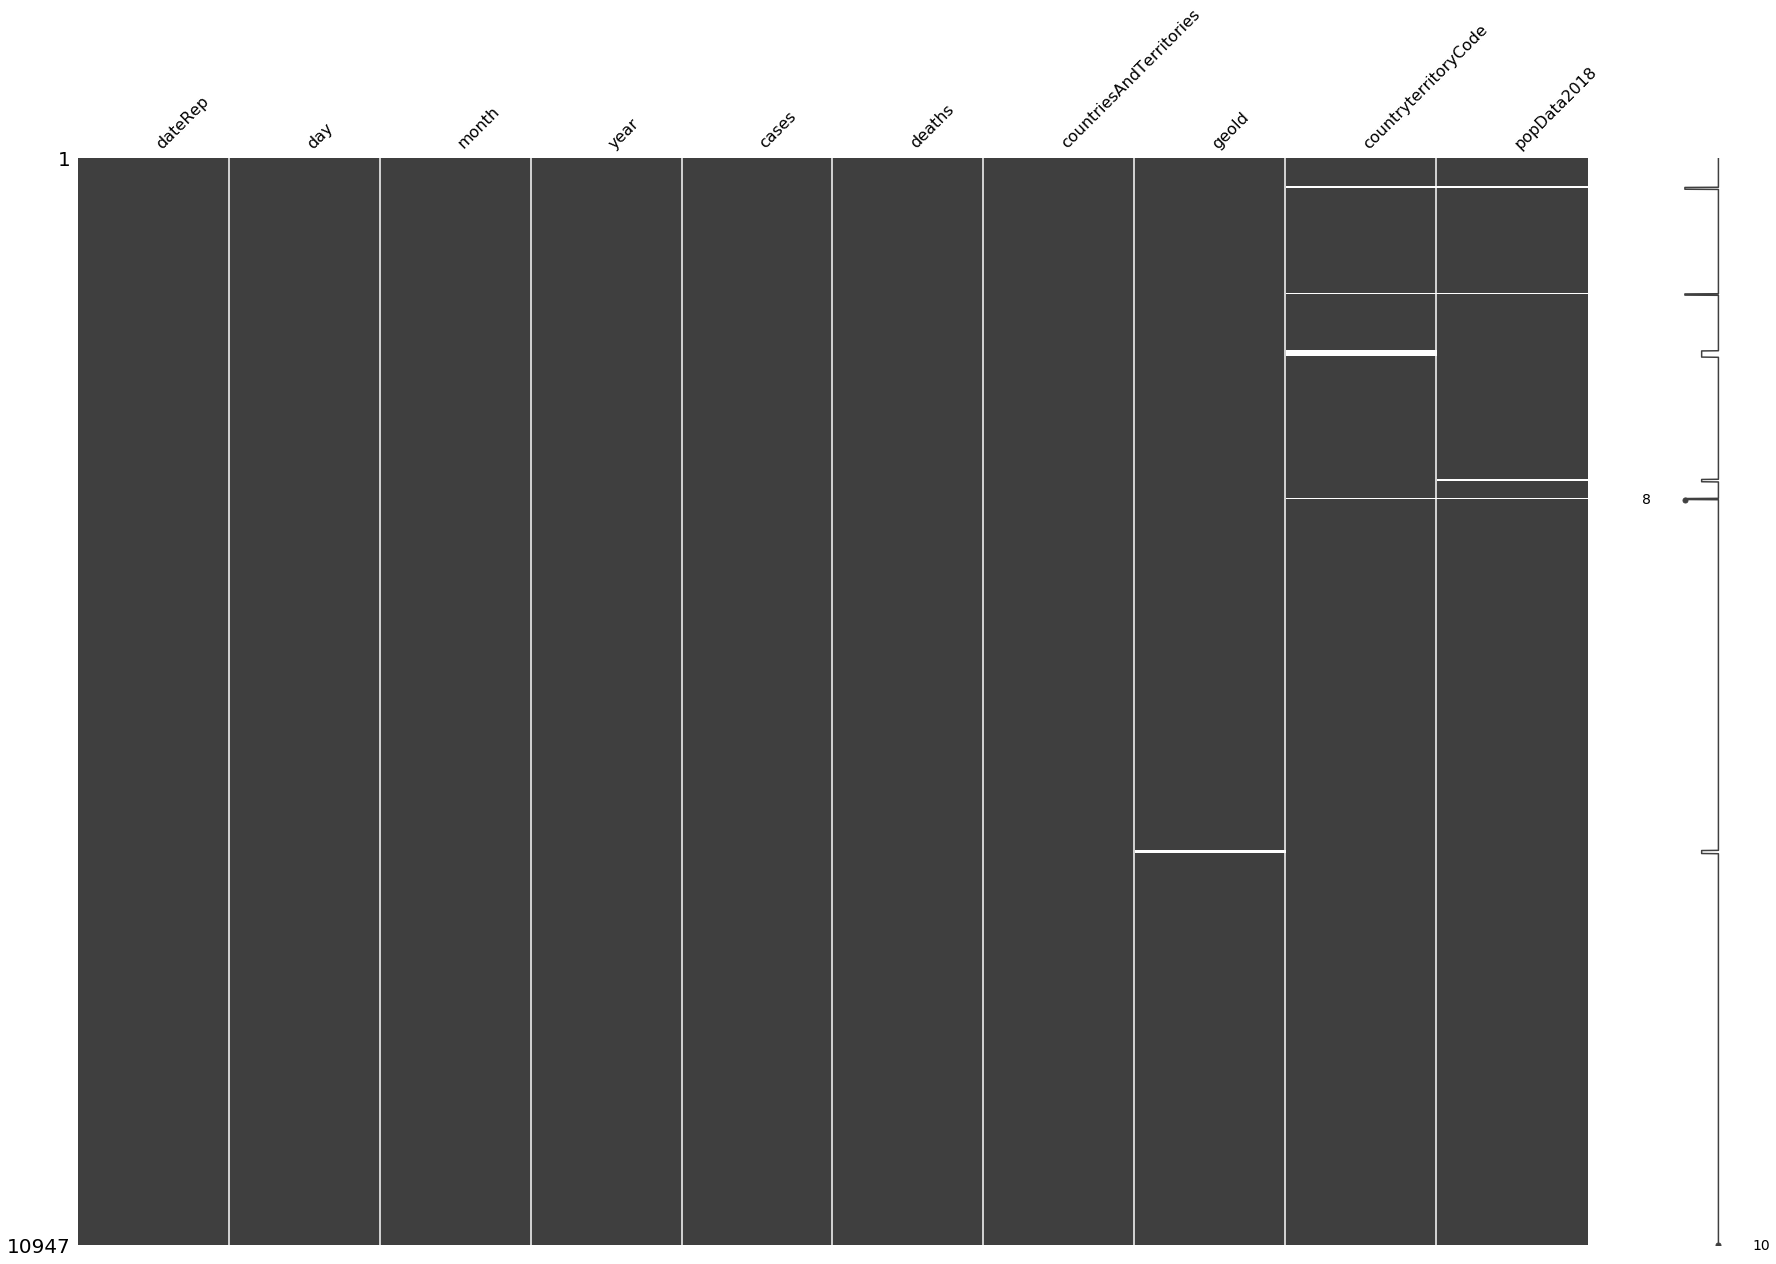

In [10]:
# Find missing data
missingno.matrix(ecdc_data, figsize = (30,20));

Some data is missing from the population and two and three letter country codes. I can work around this issue by sorting the data by country/territory names.

### Feature Engineering and Plots-ECDC

To check this data I want to calculate the total number of cases and deaths in a country and compare it to headlines, then I want to plot the time course of the pandemic in country or two to ensure its accuracy. To do this I will sort first with Pandas and then plot with Plotly and Seaborn.

In [12]:
total_count = ecdc_data.iloc[:, 4].sum()
total_death = ecdc_data.iloc[:, 5].sum()

active = total_count - total_death

print(f"Total Number of Cases: {total_count}")
print(f"Total Number of Deaths: {total_death}")
print(f"\nTotal Active Cases: {active}")

Total Number of Cases: 1948511
Total Number of Deaths: 125966

Total Active Cases: 1822545


In [13]:
# Sort data by country and date
italy_data = ecdc_data.loc[ecdc_data['countriesAndTerritories'] == 'Italy']
italy_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
5283,15/04/2020,15,4,2020,2972,604,Italy,IT,ITA,60431283.0
5284,14/04/2020,14,4,2020,3153,564,Italy,IT,ITA,60431283.0
5285,13/04/2020,13,4,2020,4092,431,Italy,IT,ITA,60431283.0
5286,12/04/2020,12,4,2020,4694,619,Italy,IT,ITA,60431283.0
5287,11/04/2020,11,4,2020,3951,570,Italy,IT,ITA,60431283.0
...,...,...,...,...,...,...,...,...,...,...
5385,04/01/2020,4,1,2020,0,0,Italy,IT,ITA,60431283.0
5386,03/01/2020,3,1,2020,0,0,Italy,IT,ITA,60431283.0
5387,02/01/2020,2,1,2020,0,0,Italy,IT,ITA,60431283.0
5388,01/01/2020,1,1,2020,0,0,Italy,IT,ITA,60431283.0


In [14]:
# Check totals of one country only

cases_italy = italy_data.iloc[:, 4].sum()
death_italy = italy_data.iloc[:, 5].sum()

print(f"Total of cases in Italy: {cases_italy}")
print(f"Total of deaths in Italy: {death_italy}")

# From the NY Times:
# Cases: 86,498
# Deaths: 9,134   (off by two...)

Total of cases in Italy: 162488
Total of deaths in Italy: 21069


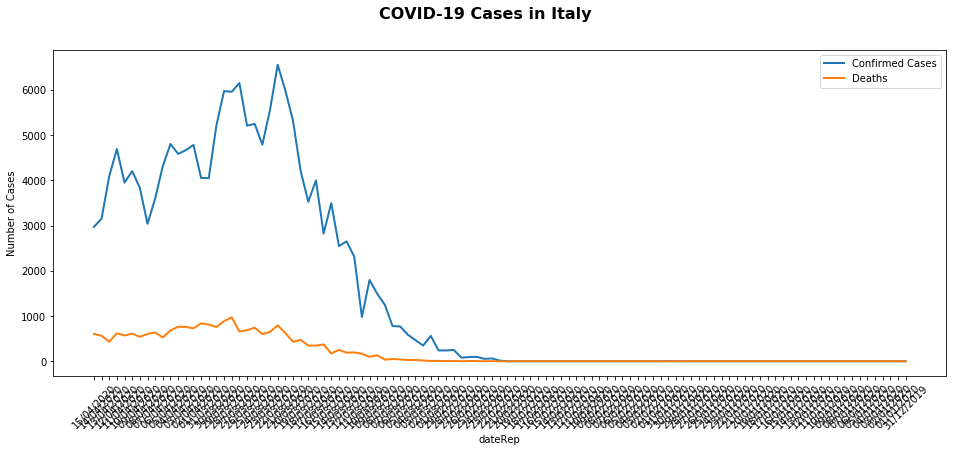

In [15]:
fig, ax = plt.subplots(figsize = (16, 6))

sns.lineplot(x=italy_data['dateRep'], y=italy_data['cases'], sort=False, linewidth = 2, label='Confirmed Cases')
sns.lineplot(x=italy_data['dateRep'], y=italy_data['deaths'], sort=False, linewidth = 2, label='Deaths')

plt.suptitle("COVID-19 Cases in Italy", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Cases')

plt.show()

### Plotting Issues-ECDC

The quick first plot of the cases and deaths in Italy clarified a couple of things that need to be fixed before I can plot the data:

* The data represents tthe number of cases or deaths reported that day. If I want to plot the cummulative cases I need to calculate the running total each day.
* The dates need to be reordered so that the go forward in time, not back.
* It might be useful to replace dates with days since a certain date.

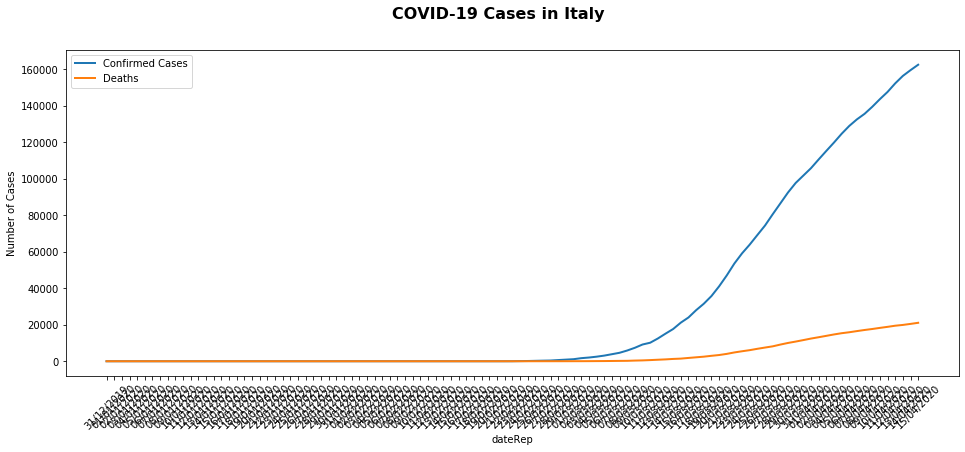

In [16]:
# Reload data to be safe
italy_data = ecdc_data.loc[ecdc_data['countriesAndTerritories'] == 'Italy']
italy_data

# Reverse dataset-Look into GROUPBY date?
reversed_italy = italy_data.iloc[::-1]

# reindex
reversed_italy.reset_index(inplace = True)

# This works but gives an warning
reversed_italy['cum_cases'] = reversed_italy['cases'].cumsum()
reversed_italy['cum_death'] = reversed_italy['deaths'].cumsum()

# Plot
fig, ax = plt.subplots(figsize = (16, 6))

sns.lineplot(x=reversed_italy['dateRep'], y=reversed_italy['cum_cases'], sort=False, linewidth = 2, label='Confirmed Cases')
sns.lineplot(x=reversed_italy['dateRep'], y=reversed_italy['cum_death'], sort=False, linewidth = 2, label='Deaths')

plt.suptitle("COVID-19 Cases in Italy", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Cases')

plt.show()

In [17]:
reversed_italy # Needs a much better name

,index,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,cum_cases,cum_death
0,5389,31/12/2019,31,12,2019,0,0,Italy,IT,ITA,60431283.0,0,0
1,5388,01/01/2020,1,1,2020,0,0,Italy,IT,ITA,60431283.0,0,0
2,5387,02/01/2020,2,1,2020,0,0,Italy,IT,ITA,60431283.0,0,0
3,5386,03/01/2020,3,1,2020,0,0,Italy,IT,ITA,60431283.0,0,0
4,5385,04/01/2020,4,1,2020,0,0,Italy,IT,ITA,60431283.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,5287,11/04/2020,11,4,2020,3951,570,Italy,IT,ITA,60431283.0,147577,18851
103,5286,12/04/2020,12,4,2020,4694,619,Italy,IT,ITA,60431283.0,152271,19470
104,5285,13/04/2020,13,4,2020,4092,431,Italy,IT,ITA,60431283.0,156363,19901
105,5284,14/04/2020,14,4,2020,3153,564,Italy,IT,ITA,60431283.0,159516,20465


## JHU Data

JHU publishes a CSV file once a night that contains up-to-date numbers for the cases, deaths and recoveries from COVID-19. This data is very useful for plotting the geographic spread of the disease because it breaks down the cases at the sub-national level for many countries (including Canada, China, and USA) and at the county-level for the United States. Unfortunately, the reports only contain data for the day on which they were published, so a time-series analysis of the data will require a little more work. Before March 25, they hosted three CSV files (cases, deaths, and recoveries) that they appended with new data each night. I previously used this data to explore and project cases in the near future with linear regression, but this update makes that analysis unusable. One goal I have for later is to bridge the gap between that analysis and the current data sets, but as we'll see using the NYT data set may overcome that issue.

This analysis uses the raw data posted to GitHub. Everyday, the data needs to be updated to the current date in a "MM-DD-YYYY"format. If the current date doesn't work, use the previous day's date because they have not uploaded the new data set.

In [18]:
# Import Data

CURRENT_DATE = "04-14-2020" # MM-DD-YYYY
JHU_DATA_URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/%s.csv" %CURRENT_DATE

jhu_data=pd.read_csv(JHU_DATA_URL)
jhu_data.head(15)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-14 23:33:31,34.223334,-82.461707,9,0,0,9,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-14 23:33:31,30.295065,-92.414197,104,5,0,99,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-14 23:33:31,37.767072,-75.632346,15,0,0,15,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-14 23:33:31,43.452658,-116.241552,538,9,0,529,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-14 23:33:31,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"
5,21001.0,Adair,Kentucky,US,2020-04-14 23:33:31,37.104598,-85.281297,43,1,0,42,"Adair, Kentucky, US"
6,29001.0,Adair,Missouri,US,2020-04-14 23:33:31,40.190586,-92.600782,12,0,0,12,"Adair, Missouri, US"
7,40001.0,Adair,Oklahoma,US,2020-04-14 23:33:31,35.884942,-94.658593,28,2,0,26,"Adair, Oklahoma, US"
8,8001.0,Adams,Colorado,US,2020-04-14 23:33:31,39.874321,-104.336258,726,27,0,699,"Adams, Colorado, US"
9,16003.0,Adams,Idaho,US,2020-04-14 23:33:31,44.893336,-116.454525,1,0,0,1,"Adams, Idaho, US"


### Data Exploration-JHU

The JHU data is composed of twelve columns, from left to right:

* **FIPS** (Float): This is the "Federal Information Processing Standards" code that some US governmental agencies use to create machine-readable databases.
* **Admin2** (String): The name of the county for entries in the united states.
* **Province_State** (String): The name of the sub-national (*e.g.* state) part of the country.
* **Country_Region** (String): The name of the country or region represented by the row.
* **Last_Update** (Datetime, YYYY-MM-DD HH:MM:SS): The time the row was last updated.
* **Lat** (Float): The average latitude of the country or region, north of the equator is positive and south is negative.
* **Long_** (Float): The average longitude of the country or region, east of the prime meridian is positive and west is negative.
* **Confirmed** (Integer): The cumulative number of confirmed cases in the country or region regardless of type.
* **Deaths** (Integer): The cumulative number of deaths due to COVID-19.
* **Recovery** (Integer): The cumulative number of people that have recovered.
* **Active** (Integer): The number of currently active cases, given as: **Active** = **Confirmed** - **Deaths** - **Recovery**.
* **Combined_Key** (String): The full name of the region of interest, *e.g.* Denver, Colorado, USA.

*Note*: By comparing the number of confirmed cases in individual rows to news reports I was able to confirm that the **Confirmed**, **Deaths**, and **Recovery** columns represent the *cumulative* total, unlike the ECDC data.

In [19]:
# Descriptive statistics

print("Cummulative Cases")
print(jhu_data["Confirmed"].describe())

print("\nCummulative Deaths")
print(jhu_data["Deaths"].describe())

print("\nCummulative Recoveries")
print(jhu_data["Recovered"].describe())


jhu_data.describe()

Cummulative Cases
count      3014.000000
mean        655.670869
std        6658.848015
min           0.000000
25%           4.000000
50%          15.000000
75%          73.000000
max      172541.000000
Name: Confirmed, dtype: float64

Cummulative Deaths
count     3014.000000
mean        41.799934
std        657.921604
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      21067.000000
Name: Deaths, dtype: float64

Cummulative Recoveries
count     3014.000000
mean       157.352687
std       2614.839591
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      68200.000000
Name: Recovered, dtype: float64


,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2737.000000,2955.000000,2955.000000,3014.000000,3014.000000,3014.000000,3014.000000
mean,31145.941542,36.627001,-80.832107,655.670869,41.799934,157.352687,456.518248
std,17153.542700,9.937178,40.359173,6658.848015,657.921604,2614.839591,4414.328681
min,66.000000,-51.796300,-159.856183,0.000000,0.000000,0.000000,-47763.000000
25%,18095.000000,33.781540,-95.730438,4.000000,0.000000,0.000000,4.000000
50%,29121.000000,37.841579,-87.382776,15.000000,0.000000,0.000000,14.000000
75%,46057.000000,41.505237,-81.008640,73.000000,2.000000,0.000000,63.000000
max,99999.000000,71.706900,178.065000,172541.000000,21067.000000,68200.000000,104291.000000


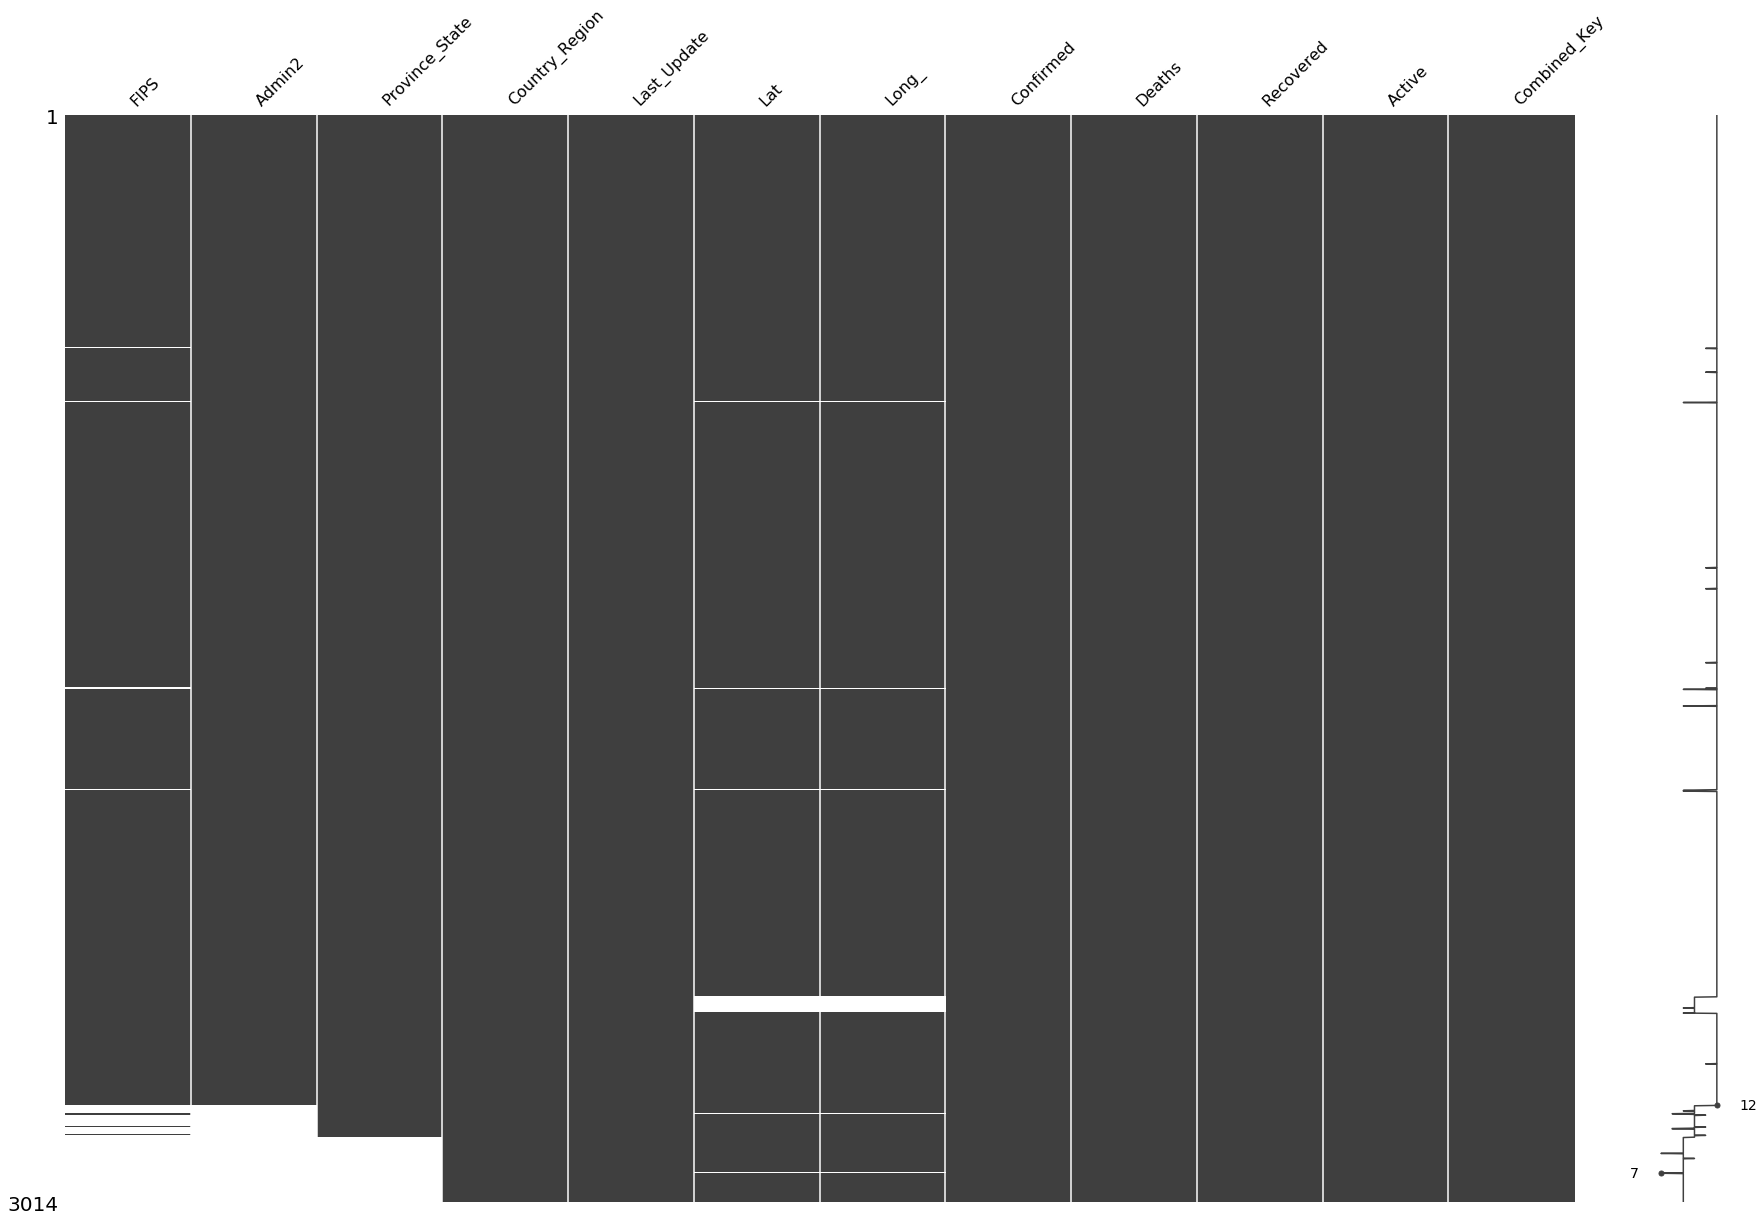

In [20]:
# Find Missing Data

missingno.matrix(jhu_data, figsize = (30,20));

It is clear that the **FIPS**, **Admin2**, and **Province_State** columns are all missing some values. It is not clear to me why non-US locations would lack a FIPS, but I do not intend to use that column. The missing values under the **Admin2** and **Province_State** columns have both been addressed: some countries do not have states/provinces, and only the US data is split into counties.

## New York Times Data

The NYT data set is a CSV file that is updated as the newspaper learns of new cases. Their goal is to track every case and their outcomes, allowing researchers to have accurate data for research. The information can be scrapped directly from their GitHub account automatically. One weakness of the data set is that it only covers the United States (as of March 28).

In [21]:
# Import Data

NYT_STATE_URL = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
NYT_COUNTIES_URL = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'

nyt_state_data = pd.read_csv(NYT_STATE_URL)
nyt_counties_data = pd.read_csv(NYT_COUNTIES_URL)

nyt_counties_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


### Data Exploration-NYT

The NYT data is split into two different CSV files: state-level data dubbed **nyt_state_data** and county-level data dubbed **nyt_counties_data**. Both data sets have the same structures with two notable differences: the county-level data has many more rows to represent the multiple counties per state, and it also has an additional column with the county name. The columns in the data sets are:

* **date** (Datetime, YYYY-MM-DD): The day the cases/deaths were reported.
* **county** (String): Name of the sub-state division (county, parish, independent city...).
* **state** (String): Name of the state.
* **fips** (Float): The Federal Information Processing Standards code defined under the JHU data exploration above.
* **cases** (Integer): The cumulative number of cases.
* **deaths** (Integer): The cumulative number of deaths.

Comparing the most up-to-date reports to the NYT's coverage makes it clear that the last two columns are the *cumulative* number of cases and deaths.

In [22]:
nyt_counties_data.describe()

,fips,cases,deaths
count,58472.000000,59249.000000,59249.000000
mean,29578.745246,116.523570,3.727590
std,15535.248926,1457.200963,77.144754
min,1001.000000,0.000000,0.000000
25%,17169.000000,2.000000,0.000000
50%,28139.000000,6.000000,0.000000
75%,42129.000000,24.000000,1.000000
max,56043.000000,110465.000000,7690.000000


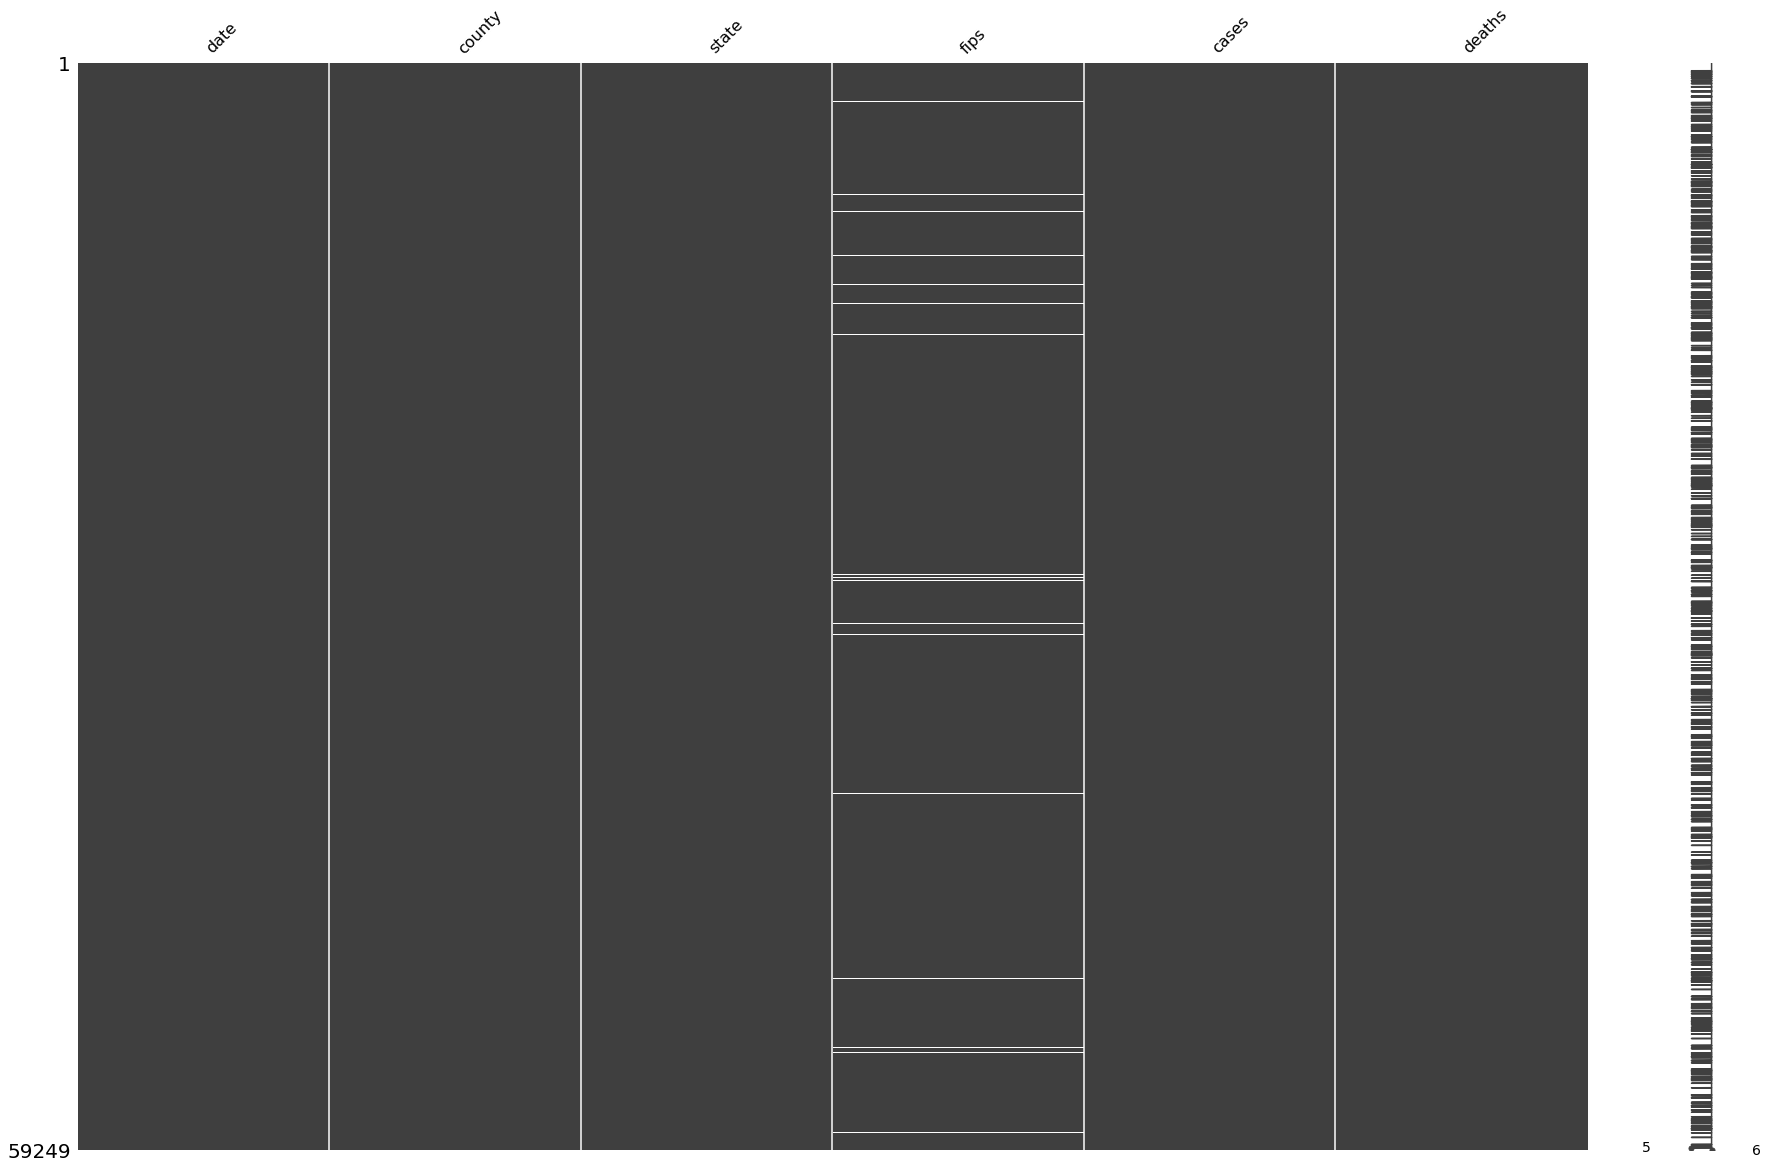

In [23]:
missingno.matrix(nyt_counties_data, figsize=(30,20));

# Some counties are missing fips.

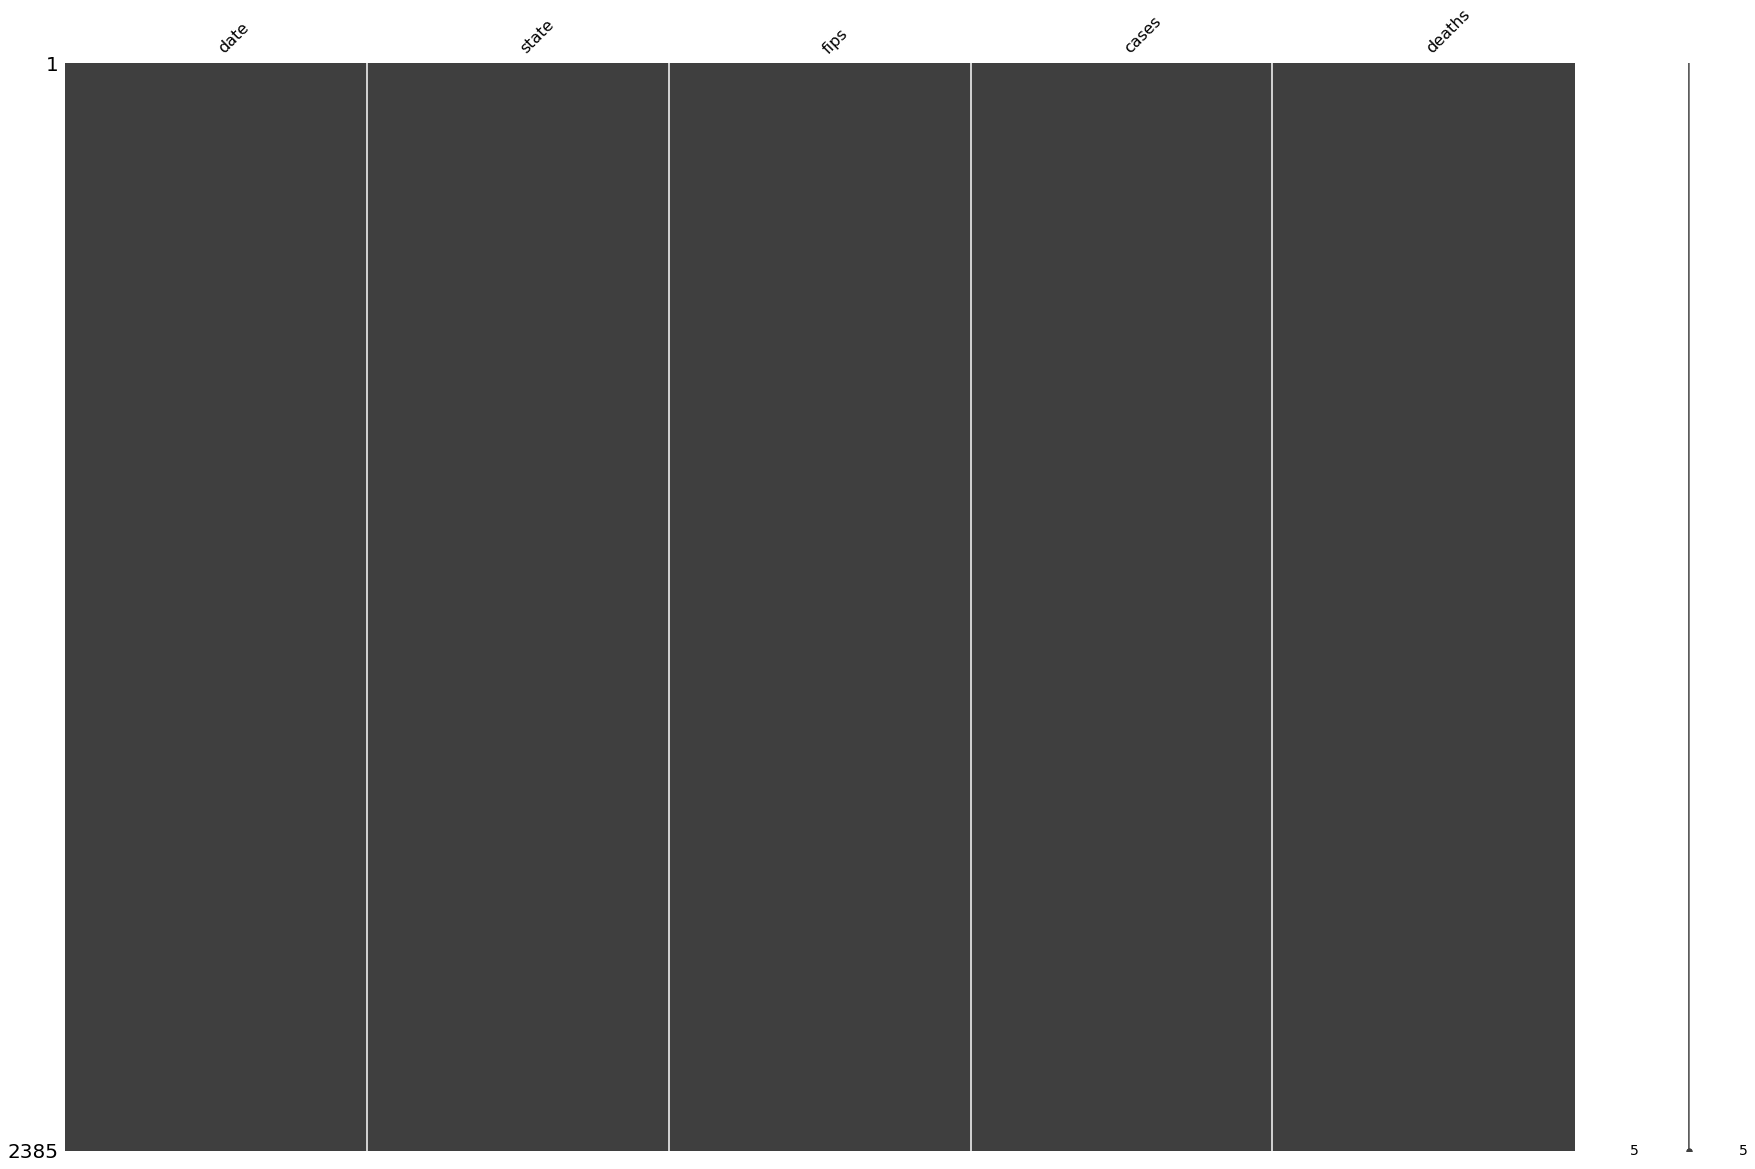

In [24]:
missingno.matrix(nyt_state_data, figsize=(30,20));

# There are no missing data in the state-level data sets.

In [25]:
# Zooming in on Washington State's data
washington_data = nyt_state_data.loc[nyt_state_data['state'] == 'Washington']
washington_data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
4,2020-01-24,Washington,53,1,0
7,2020-01-25,Washington,53,1,0
...,...,...,...,...,...
2157,2020-04-10,Washington,53,9887,483
2213,2020-04-11,Washington,53,10224,498
2269,2020-04-12,Washington,53,10411,511
2325,2020-04-13,Washington,53,10538,525


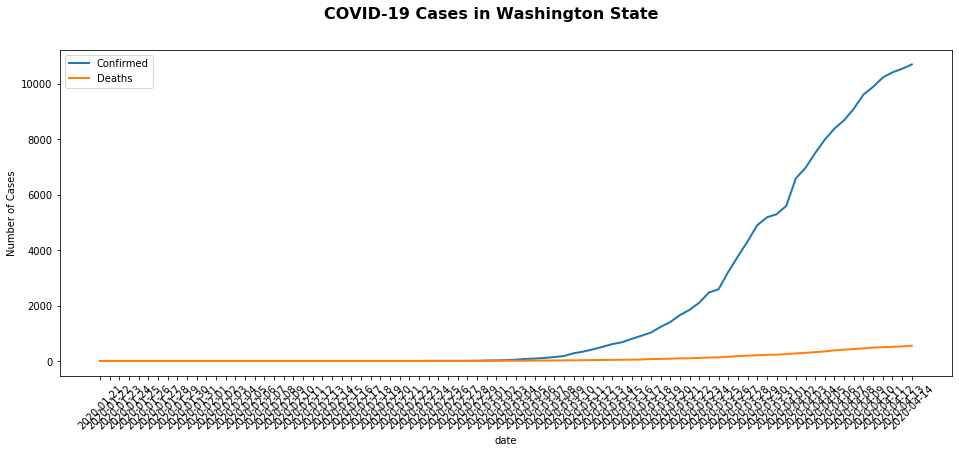

In [26]:
# Test Case-Washington (first state to report cases)

fig, ax = plt.subplots(figsize = (16,6))

sns.lineplot(x=washington_data['date'], y=washington_data['cases'], sort=False, linewidth = 2)
sns.lineplot(x=washington_data['date'], y=washington_data['deaths'], sort=False, linewidth = 2)

plt.suptitle("COVID-19 Cases in Washington State", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Cases')

ax.legend(['Confirmed', 'Deaths'])

plt.show()

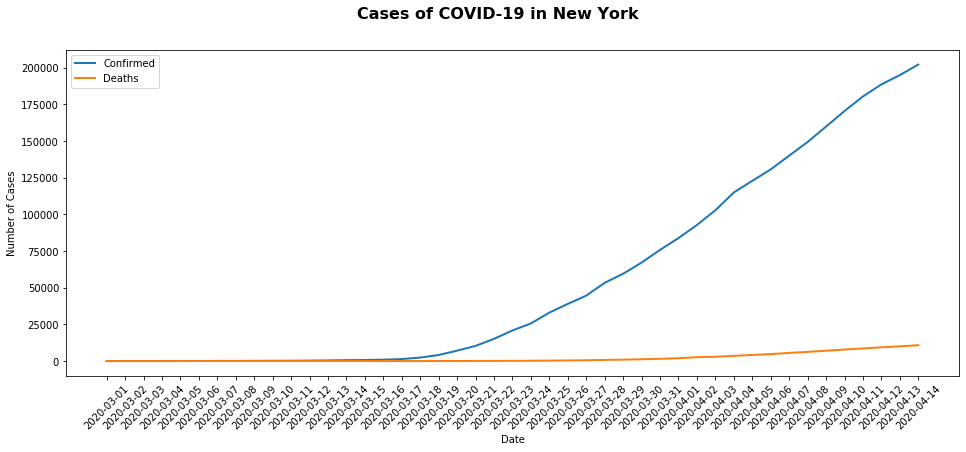

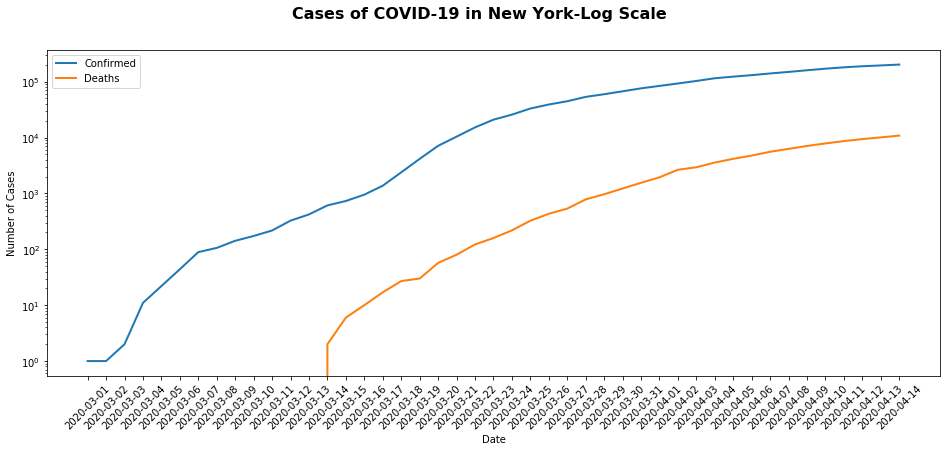

In [27]:
# Plot cases and death at state level
STATE = 'New York'

plot_data = nyt_state_data.loc[nyt_state_data['state'] == STATE]
plot_data

fig, ax = plt.subplots(figsize = (16,6))

sns.lineplot(x=plot_data['date'], y=plot_data['cases'], sort=False, linewidth = 2)
sns.lineplot(x=plot_data['date'], y=plot_data['deaths'], sort=False, linewidth = 2)

plt.suptitle(f"Cases of COVID-19 in {STATE}", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Cases')

ax.legend(['Confirmed', 'Deaths'])

plt.show()



fig,ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")

sns.lineplot(x=plot_data['date'], y=plot_data['cases'], sort=False, linewidth = 2)
sns.lineplot(x=plot_data['date'], y=plot_data['deaths'], sort=False, linewidth = 2)

plt.suptitle(f"Cases of COVID-19 in {STATE}-Log Scale", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Cases')

ax.legend(['Confirmed', 'Deaths'])

plt.show()

In [28]:
state_data = nyt_state_data.groupby(['date', 'state'], sort=True).sum().reset_index()
state_data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
2380,2020-04-14,Virginia,51,6171,154
2381,2020-04-14,Washington,53,10694,552
2382,2020-04-14,West Virginia,54,697,10
2383,2020-04-14,Wisconsin,55,3555,172


In [29]:
# Look closely at some interesting states (big ones, fast change ones, and ones I care about)

data_WA = state_data[state_data['state'] == 'Washington']           # first cases
data_NY = state_data[state_data['state'] == 'New York']             # most cases
data_NM = state_data[state_data['state'] == 'New Mexico']           # home state
data_VA = state_data[state_data['state'] == 'Virginia']             # current state
data_DC = state_data[state_data['state'] == 'District of Columbia'] # literally see it out my window
data_MD = state_data[state_data['state'] == 'Maryland']             # ditto to DC
data_NJ = state_data[state_data['state'] == 'New Jersey']           # much of my family lives here
data_CO = state_data[state_data['state'] == 'Colorado']             # ditto to NJ


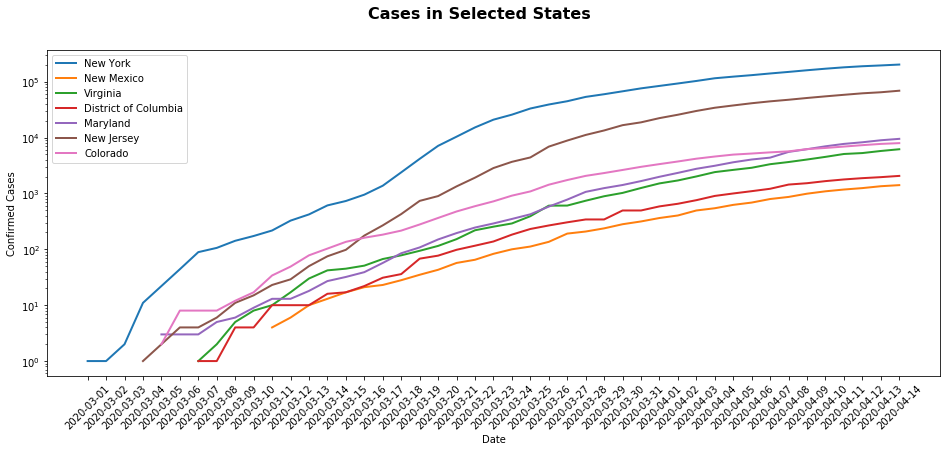

In [30]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set(yscale="log")

#sns.lineplot(x=data_WA['date'], y=data_WA['cases'],sort=False, linewidth=2, label='Washington')
sns.lineplot(x=data_NY['date'], y=data_NY['cases'],sort=False, linewidth=2, label='New York')
sns.lineplot(x=data_NM['date'], y=data_NM['cases'],sort=False, linewidth=2, label='New Mexico')
sns.lineplot(x=data_VA['date'], y=data_VA['cases'],sort=False, linewidth=2, label='Virginia')
sns.lineplot(x=data_DC['date'], y=data_DC['cases'],sort=False, linewidth=2, label='District of Columbia')
sns.lineplot(x=data_MD['date'], y=data_MD['cases'],sort=False, linewidth=2, label='Maryland')
sns.lineplot(x=data_NJ['date'], y=data_NJ['cases'],sort=False, linewidth=2, label='New Jersey')
sns.lineplot(x=data_CO['date'], y=data_CO['cases'],sort=False, linewidth=2, label='Colorado')


plt.suptitle("Cases in Selected States", fontsize=16, fontweight='bold')

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

plt.show()

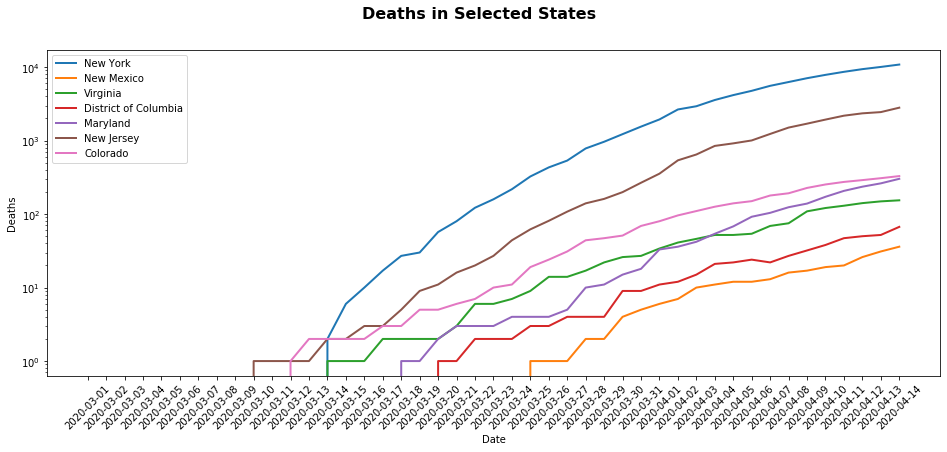

In [31]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set(yscale="log")

#sns.lineplot(x=data_WA['date'], y=data_WA['deaths'],sort=False, linewidth=2, label='Washington')
sns.lineplot(x=data_NY['date'], y=data_NY['deaths'],sort=False, linewidth=2, label='New York')
sns.lineplot(x=data_NM['date'], y=data_NM['deaths'],sort=False, linewidth=2, label='New Mexico')
sns.lineplot(x=data_VA['date'], y=data_VA['deaths'],sort=False, linewidth=2, label='Virginia')
sns.lineplot(x=data_DC['date'], y=data_DC['deaths'],sort=False, linewidth=2, label='District of Columbia')
sns.lineplot(x=data_MD['date'], y=data_MD['deaths'],sort=False, linewidth=2, label='Maryland')
sns.lineplot(x=data_NJ['date'], y=data_NJ['deaths'],sort=False, linewidth=2, label='New Jersey')
sns.lineplot(x=data_CO['date'], y=data_CO['deaths'],sort=False, linewidth=2, label='Colorado')


plt.suptitle("Deaths in Selected States", fontsize=16, fontweight='bold')

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Deaths')

plt.show()

# Next Steps

Now that I understand the data, I will take a break from EDA to move on. My plan going forward is to use the ECDC and NYT data for plotting and analyzing the evolution of the pandemic and use the JHU data for detailed geographic plots of the data. Some things that I would like to do next are:

* Automate plotting the data so that I can easily call a country or state and plot it in one line.
* Fit the curves of the cases to mathematical functions, *e.g.* exponential or logistic.
* Calculate the probabilities/confidence intervals of these fits.
* Calculate the doubling rate, potentially [recreate this graphic](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html).
* Model the system using known epidemiological models.
* Compare different nations and sub-national divisions to each other.
* Simulate social distancing, potentially [recreate this](https://www.nytimes.com/interactive/2020/03/20/us/coronavirus-model-us-outbreak.html) or [this analysis](https://www.nytimes.com/interactive/2020/03/25/opinion/coronavirus-trump-reopen-america.html).